In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

### Step 2: Preprocess the data
There will be 3 types of processed data:
- grayscaled
- colored
- selectively cropped (meaning just the leaf will be visible)

Here is what we need to do for grayscale:
- make the image grayscale
- crop the image
- convert the image into a 1 dimensional `numpy` array
- label the data so we can identify individual images within the array

In [ ]:
# Define the path to the dataset
dataset_path = 'dataset/'
def preprocess_image_grayscale(dataset_path: str):
    """Returns a 1-dimensional numpy array that represents a cropped grayscale image\n
    Given a file path, this function turns the provided image file grayscale,\n
    crops it to ........ pixels, and finally converts it into a 1-dimensional array
    """
    # convert the image into a 3 dimensional numpy array
    img = cv2.imread(dataset_path)
    # make the image grayscale, reducing it to a 2d numpy array
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # select only a portion of the numpy array to represent an ......... pixels cropped image
    # we can find center of image by halving the image dimensions
    # calculate crop boundaries (400 pixels in each direction from center)
    center_y = gray_img.shape[0] // 2
    center_x = gray_img.shape[1] // 2
    crop_size = 500
    start_y = center_y - crop_size
    start_x = center_x - crop_size
    end_y = center_y + crop_size
    end_x = center_x + crop_size
    gray_img = gray_img[start_y:end_y, start_x:end_x]

    # flatten 2d array into 1d
    return gray_img.ravel()

In [ ]:
def preprocess_image(dataset_path: str, size=(64, 64)):
    """Returns a 1-dimensional numpy array that represents a cropped grayscale image\n
    Given a file path, this function preserves the color of the image,\n
    crops it to ........ pixels, and finally converts it into a 1-dimensional array
    """
    # convert the image into a 3 dimensional numpy array
    img = cv2.imread(dataset_path)
    center_y = img.shape[0] // 2
    center_x = img.shape[1] // 2
    crop_size = 500
    start_y = center_y - crop_size
    start_x = center_x - crop_size
    end_y = center_y + crop_size
    end_x = center_x + crop_size
    img = img[start_y:end_y, start_x:end_x]
    img_resized = cv2.resize(img, size)  # Resize to reduce features
    # flatten 2d array into 1d
    return img_resized.ravel()

In [5]:
# Define the main directory path where all the folders (Healthy, Insect Hole, Black Rot) are stored
main_dir = "dataset/original/"

# List all subfolders (Healthy, Insect Hole, Black Rot)
subfolders = ['Healthy', 'Insect-Hole', 'Black-Rot']

# Resize settings (desired width and height for window size)
desired_width = 800
desired_height = 600

# Loop through all subfolders
for subfolder in subfolders:
    # Define the path to each subfolder
    image_dir = os.path.join(main_dir, subfolder)

    # List all .jpg files in the current subfolder
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]  # Ensure to include only .jpg files

    # Ensure there are images in the current subfolder
    if len(image_files) > 0:
        for image_file in image_files:
            # Construct the full path of the image
            img_path = os.path.join(image_dir, image_file)

            # Read the image (full-size, no cropping)
            img = cv2.imread(img_path)

            if img is not None:
                # Resize the image to fit the desired window size
                img_resized = cv2.resize(img, (desired_width, desired_height))

                # Convert to grayscale and resize the grayscale image as well
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                gray_resized = cv2.resize(gray_img, (desired_width, desired_height))

                # Debug: print the current folder and image being processed
                # print(f"Displaying image from {subfolder}: {image_file}")

                # Display the resized color image with the folder name in the title
                # cv2.imshow(f'Color Image: {subfolder}/{image_file}', img_resized)

                # Display the resized grayscale image with the folder name in the title
                # cv2.imshow(f'Grayscale Image: {subfolder}/{image_file}', gray_resized)

                # Wait for user input to close or move to the next image
                # while True:
                #     k = cv2.waitKey(1) & 0xFF
                #     if k == 27:  # Escape key to close the window
                #         break

        # Close all windows after all images have been displayed
        # cv2.destroyAllWindows()
    else:
        print(f"No image files found in the {subfolder} folder.")

In [6]:
X = []  # Features
y = []  # Labels
data_input_size = 200  # Number of images to process per category

# preprocess images from each disease category
# then add the preprocessed images to the dataset while labeling them
for category in ['Healthy', 'Black-Rot', 'Insect-Hole']:
    # Directory path for each category
    category_dir = f"dataset/original/{category}/"
    
    # Iterate through files in the category directory
    for file_name in os.listdir(category_dir)[:data_input_size]:
        # Construct the full file path
        file_path = os.path.join(category_dir, file_name)
        
        # Preprocess the image and add it to the feature list
        X.append(preprocess_image(file_path))
        y.append(category)  # Label corresponding to the current category

# Convert to numpy arrays
X = np.array(X)
y = LabelEncoder().fit_transform(np.array(y))  # Encode labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Handling Missing values
#Check for Nans 
print('Missing values in X:', np.isnan(X).sum())

#Replace Nans with 0 
X = np.nan_to_num(X)

Missing values in X: 0


In [8]:
#Convert feature and label lists to a DataFrame for inspection

df = pd.DataFrame(X)
df['label'] = y

#Descriptive statistics
print(df.describe())

                0           1           2           3           4           5  \
count  600.000000  600.000000  600.000000  600.000000  600.000000  600.000000   
mean    74.051667  108.221667   96.766667   72.226667  106.948333   95.291667   
std     50.397972   43.619035   50.971355   48.816052   42.465883   49.846609   
min      0.000000   10.000000    0.000000    0.000000   25.000000    1.000000   
25%     39.000000   72.750000   56.000000   38.000000   72.000000   56.000000   
50%     59.000000  105.500000   87.000000   59.000000  106.000000   86.000000   
75%     91.000000  134.000000  130.000000   87.000000  135.000000  128.000000   
max    236.000000  233.000000  238.000000  234.000000  234.000000  238.000000   

                6           7           8          9  ...       12279  \
count  600.000000  600.000000  600.000000  600.00000  ...  600.000000   
mean    71.525000  106.476667   94.736667   70.25000  ...   71.835000   
std     47.491667   42.052866   49.391699   46.3877

In [9]:
#label distribution
print(df['label'].value_counts())

label
1    200
0    200
2    200
Name: count, dtype: int64


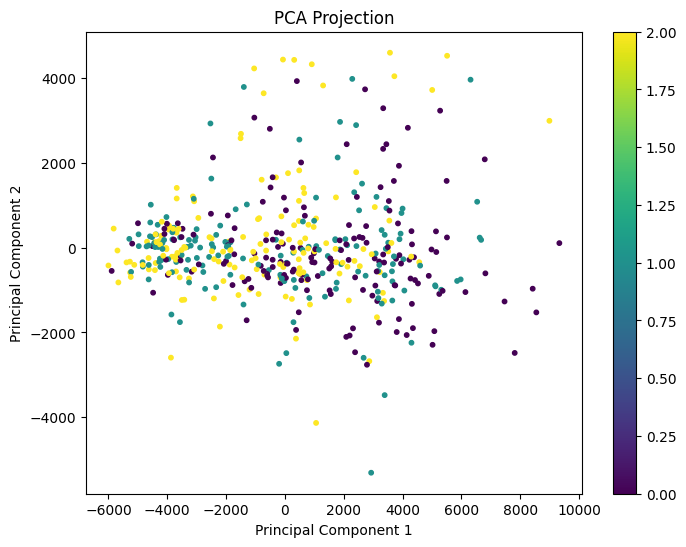

In [10]:
pca = PCA(n_components=6) 
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', s=10)
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

### Step 3: Model Selection
- Train model on preprocessed grayscale images
- Run at least 3 machine learning algorithms on the dataset
- Run `sklearn.classification_report()` to evaluate model accuracy, precision, recall, f1-score, and support

In [11]:
from sklearn.svm import SVC

**Original Images trained with Linear SVC Model**

In [12]:
svc_model_linear = SVC(kernel='linear', C=1.0, random_state=42)
svc_model_linear.fit(X_train, y_train)
y_pred = svc_model_linear.predict(X_test)

print(f"Linear SVC Model c=1")
print(f"{data_input_size} images trained")
print(classification_report(y_test, y_pred))

Linear SVC Model c=1
200 images trained
              precision    recall  f1-score   support

           0       0.59      0.64      0.61        36
           1       0.46      0.42      0.44        43
           2       0.43      0.44      0.43        41

    accuracy                           0.49       120
   macro avg       0.49      0.50      0.50       120
weighted avg       0.49      0.49      0.49       120



**Original Images trained with SVC rbf Model kernel**

In [13]:
svc_model = SVC(kernel='rbf', random_state=0)
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print(f"SVC rbf Model kernel")
print(f"{data_input_size} images trained")
print(classification_report(y_test, y_pred))

SVC rbf Model kernel
200 images trained
              precision    recall  f1-score   support

           0       0.92      0.64      0.75        36
           1       0.71      0.47      0.56        43
           2       0.51      0.83      0.63        41

    accuracy                           0.64       120
   macro avg       0.71      0.64      0.65       120
weighted avg       0.71      0.64      0.64       120



**Hyparameter tuning**

In [14]:
#Algorithm tuning: Grid Search for SVM
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1,10], 'gamma':['scale', 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel ='rbf'), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001]},
             scoring='accuracy')

In [15]:
print('Best Parameters:', grid.best_params_)
print('Best Cross_validation Accuracy:', grid.best_score_)

Best Parameters: {'C': 10, 'gamma': 'scale'}
Best Cross_validation Accuracy: 0.5437500000000001


In [16]:
#Using best estimator for further evaluation
best_svc = grid.best_estimator_
best_svc.fit(X_train, y_train)

SVC(C=10)

# Evaluation of Best Estimator using classification report

In [17]:
y_pred = best_svc.predict(X_test)
print(f"{data_input_size} images trained")
print(classification_report(y_test, y_pred))

200 images trained
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        36
           1       0.60      0.70      0.65        43
           2       0.62      0.56      0.59        41

    accuracy                           0.63       120
   macro avg       0.64      0.63      0.63       120
weighted avg       0.64      0.63      0.63       120



**Original Images trained with DecisionTreeClassifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier

dct_model = DecisionTreeClassifier(max_depth=2, random_state=0)
dct_model.fit(X_train, y_train)
y_pred = dct_model.predict(X_test)

print(f"DecisionTreeClassifier Model max_depth=2")
print(f"{data_input_size} images trained")
print(classification_report(y_test, y_pred))

DecisionTreeClassifier Model max_depth=2
200 images trained
              precision    recall  f1-score   support

           0       0.71      0.28      0.40        36
           1       0.69      0.47      0.56        43
           2       0.44      0.83      0.58        41

    accuracy                           0.53       120
   macro avg       0.62      0.52      0.51       120
weighted avg       0.61      0.53      0.52       120



**Original Images trained with RandomForestClassifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"RandomForestClassifier Model n_estimators=100")
print(rf_model.get_params)
print(f"{data_input_size} images trained")
print(classification_report(y_test, y_pred))

RandomForestClassifier Model n_estimators=100
<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=42)>
200 images trained
              precision    recall  f1-score   support

           0       0.78      0.69      0.74        36
           1       0.58      0.60      0.59        43
           2       0.49      0.51      0.50        41

    accuracy                           0.60       120
   macro avg       0.62      0.60      0.61       120
weighted avg       0.61      0.60      0.60       120



**Original Images trained with Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
# Fit logistic regression on reduced features
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.48333333333333334
              precision    recall  f1-score   support

           0       0.62      0.64      0.63        36
           1       0.43      0.56      0.48        43
           2       0.41      0.27      0.32        41

    accuracy                           0.48       120
   macro avg       0.49      0.49      0.48       120
weighted avg       0.48      0.48      0.47       120



**Feature Importances**

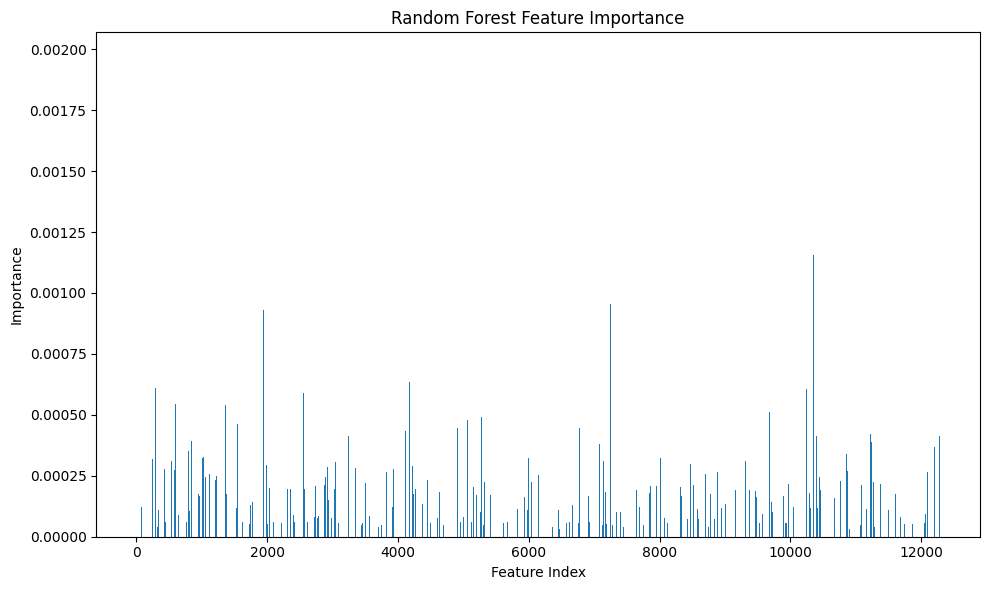

In [21]:
importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance, width=0.6)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

**Confusion Matrix**

<Axes: >

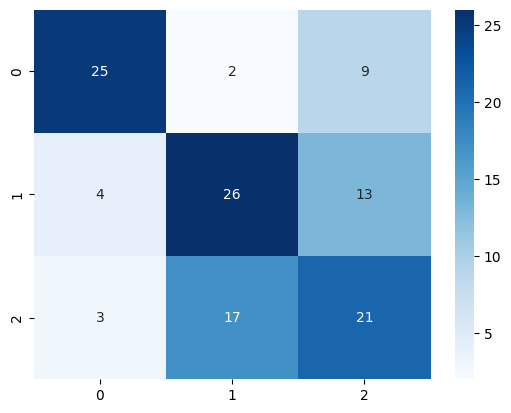

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [23]:
from xgboost import XGBClassifier
#  XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

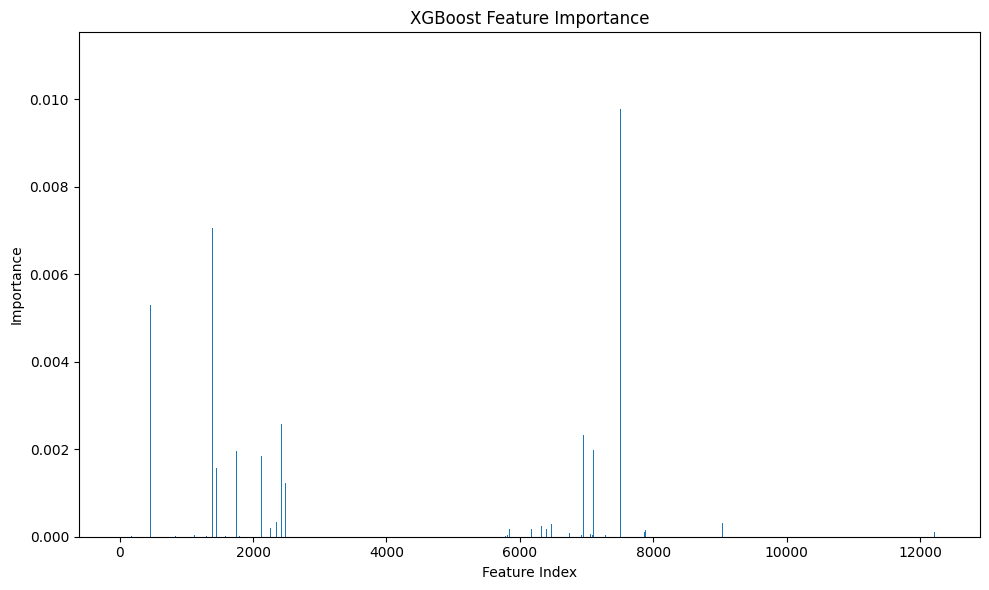

In [24]:
# Visualize feature importance for XGBoost
xgb_importance = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb_importance)), xgb_importance, width=0.6)
plt.title("XGBoost Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



In [25]:
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.78      0.69      0.74        36
           1       0.54      0.60      0.57        43
           2       0.53      0.51      0.52        41

    accuracy                           0.60       120
   macro avg       0.62      0.60      0.61       120
weighted avg       0.61      0.60      0.60       120



**Compare Algorithms**

SVM: 0.5375(+/- 0.0399)
LogReg: 0.5146(+/- 0.0313)
RF: 0.5563(+/- 0.0352)


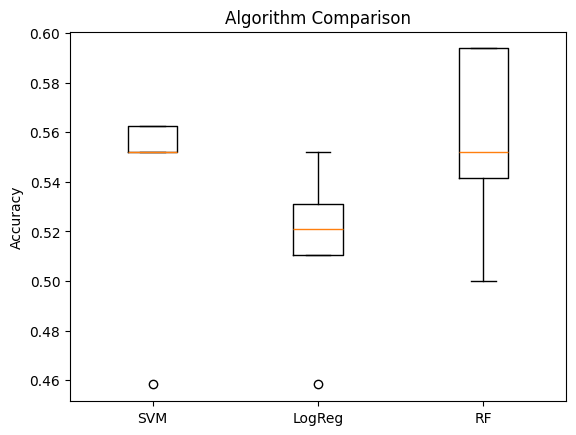

In [26]:
from sklearn.model_selection import cross_val_score

models = [('SVM', SVC()),('LogReg', LogisticRegression()),('RF', RandomForestClassifier())]

results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f}(+/- {cv_results.std():.4f})")


plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


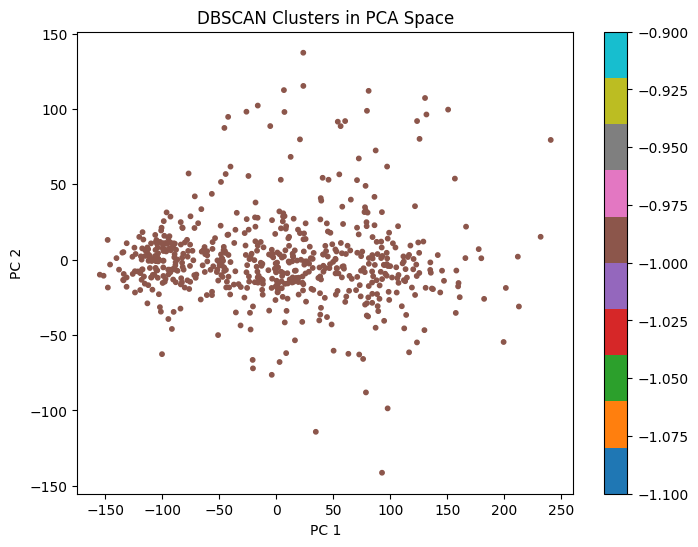

In [29]:
#  DBSCAN Clustering
from sklearn.cluster import DBSCAN

pca = PCA(n_components=6)
X_pca =pca.fit_transform(X_scaled)
# Use X_train or full X_scaled, but consistently
#X_cluster = X_train  # or X_scaled if using full data
#X_cluster_pca = PCA(n_components=6).fit_transform(X_cluster)


dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=10)
plt.title('DBSCAN Clusters in PCA Space')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()
